Embdeded Dimension Classification 

In [66]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
cd C:\Users\Admin\Dropbox (new)\Dropbox (VCADS)\turki Mustafa’s files\Home\1Work Documentation-Projects\2In progress Papers\Embedded dimention Journal paper\MATLAB code\Gearbox data\ch5_embedded

C:\Users\Admin\Dropbox (new)\Dropbox (VCADS)\turki Mustafa’s files\Home\1Work Documentation-Projects\2In progress Papers\Embedded dimention Journal paper\MATLAB code\Gearbox data\ch5_embedded


In [2]:
cd C:\Users\Admin\Dropbox (VCADS)\1Work Documentation-Projects\2In progress Papers\Embedded dimention Journal paper\MATLAB code\Gearbox data\ch5_embedded

C:\Users\Admin\Dropbox (VCADS)\1Work Documentation-Projects\2In progress Papers\Embedded dimention Journal paper\MATLAB code\Gearbox data\ch5_embedded


In [68]:
def feat_reader(filename):
    input_mat = scipy.io.loadmat(filename)
    E2 = input_mat['E2_S1']
    A = E2.tolist()
    E2 = np.asarray(A)
    del A

    E2 = E2.reshape((E2.shape[0],E2.shape[1],E2.shape[3]))
    
    A = E2[:,0,:]
    A = A.reshape(1,A.shape[0],A.shape[1])

    for isample in np.arange(1,E2.shape[1]):
        B = E2[:,isample,:]
        B = B.reshape(1,B.shape[0],B.shape[1])
        A = np.concatenate((A,B))
    
    return A    

In [69]:
# filename = 'Healthy_data_1win_15subwin.mat'
# filename = 'singlecrack_data_1win_15subwin.mat'
# filename = 'Multicrack_data_1win_15subwin.mat'
Filenames = ['Healthy_data_1win_15subwin.mat','singlecrack_data_1win_15subwin.mat','Multicrack_data_1win_15subwin.mat']
for ifile in range(0,len(Filenames)):
    if ifile == 0:
        Feat = feat_reader(Filenames[ifile])
        N = Feat.shape[0]
        Target = ifile*np.ones((N,1))
    else:
        A = feat_reader(Filenames[ifile])
        Feat = np.concatenate((Feat,A))
        N = A.shape[0]
        Target = np.concatenate((Target,ifile*np.ones((N,1))))
        
# B1 = feat_reader(Filenames[0])
# B2 = feat_reader(Filenames[1])
# B3 = feat_reader(Filenames[2])
# B = np.concatenate((B1,B2,B3))        

In [5]:
Feat[196+12,10,:]

array([0.90454714, 0.79565243, 0.63640272, 0.64143227, 0.73813584,
       0.80067739, 0.87617896, 0.94483985, 0.96508699, 0.98740422])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feat, Target, test_size=0.33, random_state=42)

In [ ]:
# X_train = Feat
# scalers = {}
# for i in range(Feat.shape[1]):
#     scalers[i] = StandardScaler()
#     X_train[:, i, :] = scalers[i].fit_transform(Feat[:, i, :]) 
# X_train.shape

In [71]:
from tensorflow.keras import Model, layers
from keras.callbacks import ModelCheckpoint # it si important not only to save the final results but every result at every iteration in case if the program crashes

In [105]:
seed_num = 1
import os
os.environ['PYTHONHASHSEED']=str(seed_num)

import random
random.seed(seed_num)

seed_num = 1
from numpy.random import seed
seed(seed_num)
import tensorflow
tensorflow.random.set_seed(seed_num)

In [117]:
input1 = layers.Input(shape = (Feat.shape[1:]),name = 'input1')
x = layers.Flatten()(input1)
x = layers.Dense(units = 20,activation = 'relu')(x)
# x = layers.Dense(units = 5,activation = 'relu')(x)
output1 = layers.Dense(3,activation = 'softmax',name = 'output1')(x)

model = Model(inputs = {'input1':input1},outputs = {'output1':output1})

In [118]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          [(None, 15, 10)]          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                3020      
_________________________________________________________________
output1 (Dense)              (None, 3)                 63        
Total params: 3,083
Trainable params: 3,083
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpointer = ModelCheckpoint('D2NN_ED_v1.h5',save_best_only = True)

# history = model.fit(X_train.reshape([X_train.shape[0],X_train.shape[1],X_train.shape[2],1]),y_train,epochs=1000,validation_split=0.1,batch_size=64,callbacks=[checkpointer])
history = model.fit(X_train,y_train,epochs=1000,validation_split=0.1,callbacks=[checkpointer])

Train on 176 samples, validate on 20 samples
Epoch 1/1000
176/176 [==============================] - 0s 2ms/sample - loss: 1.1291 - accuracy: 0.3807 - val_loss: 1.0256 - val_accuracy: 0.6500
Epoch 2/1000
176/176 [==============================] - 0s 136us/sample - loss: 1.0588 - accuracy: 0.3466 - val_loss: 1.0396 - val_accuracy: 0.4500
Epoch 3/1000
176/176 [==============================] - 0s 136us/sample - loss: 1.0332 - accuracy: 0.5000 - val_loss: 1.0601 - val_accuracy: 0.5000
Epoch 4/1000
176/176 [==============================] - 0s 386us/sample - loss: 1.0051 - accuracy: 0.5455 - val_loss: 0.9717 - val_accuracy: 0.6000
Epoch 5/1000
176/176 [==============================] - 0s 432us/sample - loss: 0.9739 - accuracy: 0.5966 - val_loss: 0.9578 - val_accuracy: 0.6500
Epoch 6/1000
176/176 [==============================] - 0s 432us/sample - loss: 0.9477 - accuracy: 0.7045 - val_loss: 0.9455 - val_accuracy: 0.7500
Epoch 7/1000
176/176 [==============================] - 0s 341us/samp

Epoch 56/1000
176/176 [==============================] - 0s 454us/sample - loss: 0.3259 - accuracy: 0.9034 - val_loss: 0.4497 - val_accuracy: 0.7500
Epoch 57/1000
176/176 [==============================] - 0s 500us/sample - loss: 0.3291 - accuracy: 0.8977 - val_loss: 0.4427 - val_accuracy: 0.7500
Epoch 58/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.3212 - accuracy: 0.9261 - val_loss: 0.4696 - val_accuracy: 0.7000
Epoch 59/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.3173 - accuracy: 0.8920 - val_loss: 0.4747 - val_accuracy: 0.7000
Epoch 60/1000
176/176 [==============================] - 0s 477us/sample - loss: 0.3177 - accuracy: 0.9148 - val_loss: 0.4374 - val_accuracy: 0.7500
Epoch 61/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.3131 - accuracy: 0.9034 - val_loss: 0.4556 - val_accuracy: 0.7000
Epoch 62/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.3102 - accuracy: 0.9261

Epoch 111/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.2312 - accuracy: 0.9148 - val_loss: 0.4009 - val_accuracy: 0.8000
Epoch 112/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.2305 - accuracy: 0.9375 - val_loss: 0.3852 - val_accuracy: 0.8000
Epoch 113/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.2312 - accuracy: 0.9318 - val_loss: 0.4122 - val_accuracy: 0.7500
Epoch 114/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.2258 - accuracy: 0.9205 - val_loss: 0.3867 - val_accuracy: 0.8000
Epoch 115/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.2246 - accuracy: 0.9432 - val_loss: 0.3996 - val_accuracy: 0.8000
Epoch 116/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.2240 - accuracy: 0.9148 - val_loss: 0.3962 - val_accuracy: 0.8000
Epoch 117/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.2291 - accuracy:

176/176 [==============================] - 0s 159us/sample - loss: 0.1874 - accuracy: 0.9489 - val_loss: 0.3519 - val_accuracy: 0.8000
Epoch 166/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1907 - accuracy: 0.9375 - val_loss: 0.3733 - val_accuracy: 0.8000
Epoch 167/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1859 - accuracy: 0.9432 - val_loss: 0.3433 - val_accuracy: 0.8000
Epoch 168/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1836 - accuracy: 0.9545 - val_loss: 0.3806 - val_accuracy: 0.8000
Epoch 169/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1933 - accuracy: 0.9205 - val_loss: 0.3530 - val_accuracy: 0.8000
Epoch 170/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1831 - accuracy: 0.9432 - val_loss: 0.3625 - val_accuracy: 0.8000
Epoch 171/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1849 - accuracy: 0.9545 - val_l

176/176 [==============================] - 0s 159us/sample - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.3424 - val_accuracy: 0.8000
Epoch 220/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.3181 - val_accuracy: 0.8500
Epoch 221/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1575 - accuracy: 0.9545 - val_loss: 0.3259 - val_accuracy: 0.8500
Epoch 222/1000
176/176 [==============================] - 0s 204us/sample - loss: 0.1583 - accuracy: 0.9545 - val_loss: 0.3185 - val_accuracy: 0.8500
Epoch 223/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.1591 - accuracy: 0.9545 - val_loss: 0.3251 - val_accuracy: 0.8500
Epoch 224/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.3182 - val_accuracy: 0.8500
Epoch 225/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1556 - accuracy: 0.9489 - val_l

Epoch 274/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1396 - accuracy: 0.9545 - val_loss: 0.2895 - val_accuracy: 0.8500
Epoch 275/1000
176/176 [==============================] - 0s 295us/sample - loss: 0.1490 - accuracy: 0.9545 - val_loss: 0.2869 - val_accuracy: 0.8500
Epoch 276/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1351 - accuracy: 0.9489 - val_loss: 0.3110 - val_accuracy: 0.8500
Epoch 277/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1393 - accuracy: 0.9602 - val_loss: 0.2876 - val_accuracy: 0.8500
Epoch 278/1000
176/176 [==============================] - 0s 91us/sample - loss: 0.1472 - accuracy: 0.9489 - val_loss: 0.2895 - val_accuracy: 0.8500
Epoch 279/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.1411 - accuracy: 0.9489 - val_loss: 0.2965 - val_accuracy: 0.8500
Epoch 280/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1351 - accuracy: 

176/176 [==============================] - 0s 114us/sample - loss: 0.1192 - accuracy: 0.9545 - val_loss: 0.2696 - val_accuracy: 0.8500
Epoch 329/1000
176/176 [==============================] - 0s 318us/sample - loss: 0.1203 - accuracy: 0.9602 - val_loss: 0.2675 - val_accuracy: 0.8500
Epoch 330/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1183 - accuracy: 0.9602 - val_loss: 0.2763 - val_accuracy: 0.8500
Epoch 331/1000
176/176 [==============================] - 0s 318us/sample - loss: 0.1148 - accuracy: 0.9545 - val_loss: 0.2658 - val_accuracy: 0.8500
Epoch 332/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1166 - accuracy: 0.9545 - val_loss: 0.2663 - val_accuracy: 0.8500
Epoch 333/1000
176/176 [==============================] - 0s 318us/sample - loss: 0.1151 - accuracy: 0.9545 - val_loss: 0.2640 - val_accuracy: 0.8500
Epoch 334/1000
176/176 [==============================] - 0s 318us/sample - loss: 0.1153 - accuracy: 0.9602 - val_l

176/176 [==============================] - 0s 114us/sample - loss: 0.1072 - accuracy: 0.9602 - val_loss: 0.2516 - val_accuracy: 0.8500
Epoch 383/1000
176/176 [==============================] - 0s 295us/sample - loss: 0.0996 - accuracy: 0.9659 - val_loss: 0.2476 - val_accuracy: 0.8500
Epoch 384/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.1067 - accuracy: 0.9545 - val_loss: 0.2520 - val_accuracy: 0.8500
Epoch 385/1000
176/176 [==============================] - 0s 295us/sample - loss: 0.1030 - accuracy: 0.9659 - val_loss: 0.2458 - val_accuracy: 0.8500
Epoch 386/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0978 - accuracy: 0.9602 - val_loss: 0.2511 - val_accuracy: 0.8500
Epoch 387/1000
176/176 [==============================] - 0s 341us/sample - loss: 0.1056 - accuracy: 0.9602 - val_loss: 0.2449 - val_accuracy: 0.8500
Epoch 388/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.1008 - accuracy: 0.9659 - val_l

Epoch 437/1000
176/176 [==============================] - 0s 432us/sample - loss: 0.0957 - accuracy: 0.9659 - val_loss: 0.2340 - val_accuracy: 0.8500
Epoch 438/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0870 - accuracy: 0.9716 - val_loss: 0.2374 - val_accuracy: 0.8500
Epoch 439/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0887 - accuracy: 0.9716 - val_loss: 0.2347 - val_accuracy: 0.8500
Epoch 440/1000
176/176 [==============================] - 0s 386us/sample - loss: 0.0922 - accuracy: 0.9773 - val_loss: 0.2320 - val_accuracy: 0.8500
Epoch 441/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0914 - accuracy: 0.9659 - val_loss: 0.2323 - val_accuracy: 0.8500
Epoch 442/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0873 - accuracy: 0.9773 - val_loss: 0.2349 - val_accuracy: 0.8500
Epoch 443/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0848 - accuracy:

176/176 [==============================] - 0s 182us/sample - loss: 0.0864 - accuracy: 0.9716 - val_loss: 0.2242 - val_accuracy: 0.8500
Epoch 492/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0729 - accuracy: 0.9830 - val_loss: 0.2319 - val_accuracy: 0.8500
Epoch 493/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0787 - accuracy: 0.9830 - val_loss: 0.2234 - val_accuracy: 0.8500
Epoch 494/1000
176/176 [==============================] - 0s 295us/sample - loss: 0.0758 - accuracy: 0.9716 - val_loss: 0.2223 - val_accuracy: 0.8500
Epoch 495/1000
176/176 [==============================] - 0s 341us/sample - loss: 0.0731 - accuracy: 0.9830 - val_loss: 0.2222 - val_accuracy: 0.8500
Epoch 496/1000
176/176 [==============================] - 0s 364us/sample - loss: 0.0752 - accuracy: 0.9830 - val_loss: 0.2220 - val_accuracy: 0.8500
Epoch 497/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0737 - accuracy: 0.9773 - val_l

Epoch 546/1000
176/176 [==============================] - 0s 295us/sample - loss: 0.0686 - accuracy: 0.9886 - val_loss: 0.2117 - val_accuracy: 0.8500
Epoch 547/1000
176/176 [==============================] - 0s 341us/sample - loss: 0.0672 - accuracy: 0.9830 - val_loss: 0.2116 - val_accuracy: 0.8500
Epoch 548/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0702 - accuracy: 0.9773 - val_loss: 0.2139 - val_accuracy: 0.8500
Epoch 549/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0713 - accuracy: 0.9716 - val_loss: 0.2161 - val_accuracy: 0.8500
Epoch 550/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0717 - accuracy: 0.9830 - val_loss: 0.2146 - val_accuracy: 0.8500
Epoch 551/1000
176/176 [==============================] - 0s 204us/sample - loss: 0.0678 - accuracy: 0.9830 - val_loss: 0.2124 - val_accuracy: 0.8500
Epoch 552/1000
176/176 [==============================] - 0s 432us/sample - loss: 0.0657 - accuracy:

176/176 [==============================] - 0s 341us/sample - loss: 0.0612 - accuracy: 0.9830 - val_loss: 0.2052 - val_accuracy: 0.8500
Epoch 601/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0550 - accuracy: 0.9943 - val_loss: 0.2083 - val_accuracy: 0.8500
Epoch 602/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0597 - accuracy: 0.9943 - val_loss: 0.2074 - val_accuracy: 0.8500
Epoch 603/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0615 - accuracy: 0.9886 - val_loss: 0.2064 - val_accuracy: 0.8500
Epoch 604/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0612 - accuracy: 0.9830 - val_loss: 0.2069 - val_accuracy: 0.8500
Epoch 605/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0646 - accuracy: 0.9886 - val_loss: 0.2110 - val_accuracy: 0.8500
Epoch 606/1000
176/176 [==============================] - 0s 114us/sample - loss: 0.0513 - accuracy: 0.9886 - val_l

176/176 [==============================] - 0s 136us/sample - loss: 0.0539 - accuracy: 1.0000 - val_loss: 0.2029 - val_accuracy: 0.8500
Epoch 655/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0668 - accuracy: 0.9773 - val_loss: 0.2030 - val_accuracy: 0.8500
Epoch 656/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0555 - accuracy: 0.9886 - val_loss: 0.2119 - val_accuracy: 0.9000
Epoch 657/1000
176/176 [==============================] - 0s 204us/sample - loss: 0.0463 - accuracy: 0.9943 - val_loss: 0.2118 - val_accuracy: 0.8500
Epoch 658/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.2074 - val_accuracy: 0.8500
Epoch 659/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0606 - accuracy: 0.9943 - val_loss: 0.2031 - val_accuracy: 0.8500
Epoch 660/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0506 - accuracy: 0.9943 - val_l

Epoch 709/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0460 - accuracy: 0.9943 - val_loss: 0.1993 - val_accuracy: 0.8500
Epoch 710/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0443 - accuracy: 0.9943 - val_loss: 0.1978 - val_accuracy: 0.8500
Epoch 711/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0446 - accuracy: 0.9943 - val_loss: 0.1982 - val_accuracy: 0.9000
Epoch 712/1000
176/176 [==============================] - 0s 386us/sample - loss: 0.0431 - accuracy: 0.9943 - val_loss: 0.1956 - val_accuracy: 0.9000
Epoch 713/1000
176/176 [==============================] - 0s 454us/sample - loss: 0.0424 - accuracy: 0.9943 - val_loss: 0.1949 - val_accuracy: 0.8500
Epoch 714/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0428 - accuracy: 0.9943 - val_loss: 0.1955 - val_accuracy: 0.9000
Epoch 715/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0435 - accuracy:

176/176 [==============================] - 0s 159us/sample - loss: 0.0398 - accuracy: 0.9943 - val_loss: 0.1931 - val_accuracy: 0.8500
Epoch 764/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0373 - accuracy: 0.9943 - val_loss: 0.1973 - val_accuracy: 0.9000
Epoch 765/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0375 - accuracy: 1.0000 - val_loss: 0.1937 - val_accuracy: 0.8500
Epoch 766/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0403 - accuracy: 0.9943 - val_loss: 0.1949 - val_accuracy: 0.9000
Epoch 767/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0375 - accuracy: 0.9943 - val_loss: 0.1944 - val_accuracy: 0.9000
Epoch 768/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0379 - accuracy: 0.9943 - val_loss: 0.1936 - val_accuracy: 0.8500
Epoch 769/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0372 - accuracy: 0.9943 - val_l

Epoch 818/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9000
Epoch 819/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0412 - accuracy: 0.9943 - val_loss: 0.1891 - val_accuracy: 0.9000
Epoch 820/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9000
Epoch 821/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0357 - accuracy: 0.9943 - val_loss: 0.1914 - val_accuracy: 0.8500
Epoch 822/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.1898 - val_accuracy: 0.9000
Epoch 823/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0355 - accuracy: 0.9943 - val_loss: 0.1908 - val_accuracy: 0.8500
Epoch 824/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0349 - accuracy:

176/176 [==============================] - 0s 159us/sample - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.1942 - val_accuracy: 0.9000
Epoch 873/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0295 - accuracy: 0.9943 - val_loss: 0.1862 - val_accuracy: 0.9000
Epoch 874/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0290 - accuracy: 0.9943 - val_loss: 0.1903 - val_accuracy: 0.9000
Epoch 875/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.1865 - val_accuracy: 0.9000
Epoch 876/1000
176/176 [==============================] - 0s 409us/sample - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.1838 - val_accuracy: 0.9000
Epoch 877/1000
176/176 [==============================] - 0s 386us/sample - loss: 0.0312 - accuracy: 0.9943 - val_loss: 0.1836 - val_accuracy: 0.9000
Epoch 878/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0292 - accuracy: 1.0000 - val_l

Epoch 927/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0264 - accuracy: 0.9943 - val_loss: 0.1894 - val_accuracy: 0.9000
Epoch 928/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9000
Epoch 929/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.1862 - val_accuracy: 0.9000
Epoch 930/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0268 - accuracy: 0.9943 - val_loss: 0.1880 - val_accuracy: 0.9000
Epoch 931/1000
176/176 [==============================] - 0s 205us/sample - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.1866 - val_accuracy: 0.9000
Epoch 932/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.1848 - val_accuracy: 0.9000
Epoch 933/1000
176/176 [==============================] - 0s 182us/sample - loss: 0.0280 - accuracy:

176/176 [==============================] - 0s 159us/sample - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.1899 - val_accuracy: 0.9000
Epoch 982/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0230 - accuracy: 0.9943 - val_loss: 0.1885 - val_accuracy: 0.9000
Epoch 983/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.1920 - val_accuracy: 0.9000
Epoch 984/1000
176/176 [==============================] - 0s 136us/sample - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.1891 - val_accuracy: 0.9000
Epoch 985/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 0.9000
Epoch 986/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.1866 - val_accuracy: 0.9000
Epoch 987/1000
176/176 [==============================] - 0s 159us/sample - loss: 0.0214 - accuracy: 1.0000 - val_l

In [120]:
from tensorflow import keras
model = keras.models.load_model('D2NN_ED_v1.h5') 

Text(0, 0.5, 'values')

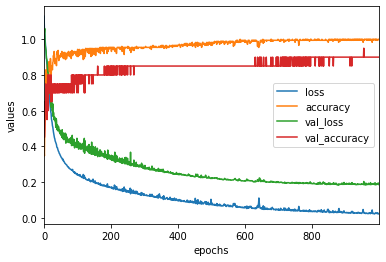

In [121]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('values')

In [122]:
results = model.evaluate({'input1':X_test}, y_test)
print('test loss, test acc:', results)

98/98 [==============================] - 0s 2ms/sample - loss: 0.0398 - accuracy: 1.0000
test loss, test acc: [0.03981375084029943, 1.0]


In [123]:
y_pred = model.predict({'input1':X_test})

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
y_pred = np.argmax(y_pred,axis=1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

(98, 1)

In [126]:
confusion_matrix(y_test,y_pred)

array([[38,  0,  0],
       [ 0, 31,  0],
       [ 0,  0, 29]], dtype=int64)

In [127]:
y_pred = model.predict({'input1':X_train})
y_pred = np.argmax(y_pred,axis=1)
y_pred = y_pred.reshape(-1,1)
confusion_matrix(y_train,y_pred)

array([[59,  1,  0],
       [ 2, 65,  0],
       [ 0,  0, 69]], dtype=int64)